
| <h1> Hands-on Activity 6.2 </h1> | <h1> Training Neural Networks </h1> |
|--- | --- |
Name: Buan, Danilo Jr. G. <br>
Course and Section: CPE019/CPE32S3 <br>
Date Submitted: 04/02/24 <br>
Instructor: Engr. Roman M. Richard
Date Performed: 04/02/24


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
381,0,105,68,22,0,20.0,0.236,22,0
757,0,123,72,0,0,36.3,0.258,52,1
642,6,147,80,0,0,29.5,0.178,50,1
63,2,141,58,34,128,25.4,0.699,24,0
375,12,140,82,43,325,39.2,0.528,58,1


In [6]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [12]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [13]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 23ms/step - loss: 0.8650 - accuracy: 0.3958 - val_loss: 0.8467 - val_accuracy: 0.4167
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.8154 - accuracy: 0.4115 - val_loss: 0.8052 - val_accuracy: 0.4479
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7750 - accuracy: 0.4549 - val_loss: 0.7707 - val_accuracy: 0.5208
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.7411 - accuracy: 0.5104 - val_loss: 0.7418 - val_accuracy: 0.5573
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.5816 - val_loss: 0.7170 - val_accuracy: 0.5938
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.6128 - val_loss: 0.6955 - val_accuracy: 0.6406
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.6337 - val_loss: 0.6766 - val_accuracy: 0.6510
Epoch 8/200


In [16]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


In [17]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [18]:
y_pred_prob_nn_1[:10]

array([[0.6332816 ],
       [0.556432  ],
       [0.3881246 ],
       [0.29449975],
       [0.16094974],
       [0.49249297],
       [0.02398692],
       [0.4036895 ],
       [0.9366343 ],
       [0.12252731]], dtype=float32)

Observation: The initial code given has encountered errors such as model_1 is not defined, and solved it by removing the _1 part of the code. Another problem encountered was the "'Sequential' object has no attribute 'predict_classes'", and solved it without using predict_classes and used (model.predict(X_test_norm) > 0.5).astype('int32') as it compares the predicted probabilities against a threshold of 0.5 and converts them to binary decisions.

Create the plot_roc function

In [19]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.755
roc-auc is 0.820


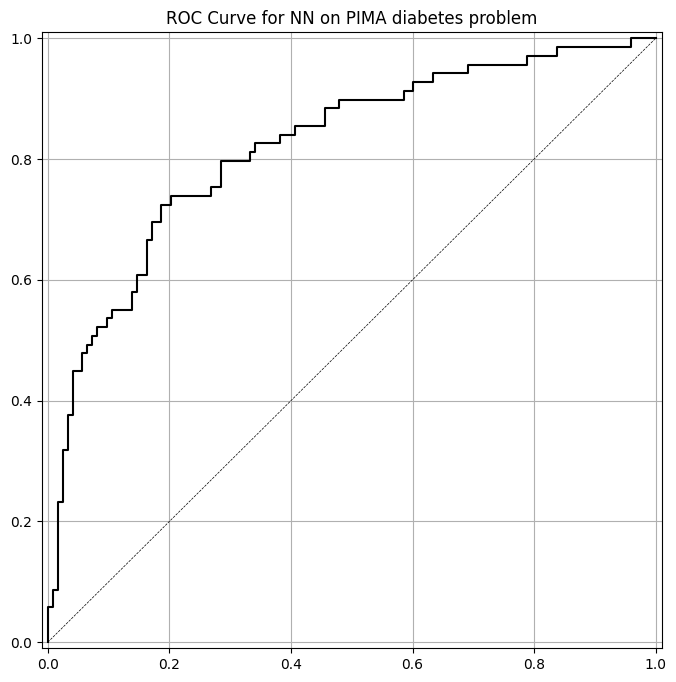

In [20]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [21]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

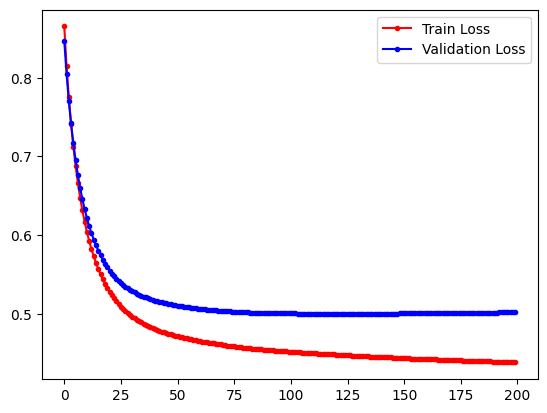

In [22]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#What is your interpretation about the result of the train and validation loss?
- Both of the train and validation loss follows a similar curve closely and both converged to a low value indicating that the model is performing well, and the gap between the two curves indicates that it is not overfitting.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [27]:
#Build a model with two hidden layers, each with 6 nodes
#Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model_1 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [28]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 54        
                                                                 
 dense_9 (Dense)             (None, 6)                 42        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
#Use a learning rate of .003 and train for 1500 epochs
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 20ms/step - loss: 0.7023 - accuracy: 0.5816 - val_loss: 0.7024 - val_accuracy: 0.6250
Epoch 2/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.6958 - accuracy: 0.6406 - val_loss: 0.6962 - val_accuracy: 0.6562
Epoch 3/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.6545 - val_loss: 0.6904 - val_accuracy: 0.6615
Epoch 4/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.6597 - val_loss: 0.6850 - val_accuracy: 0.6562
Epoch 5/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.6784 - accuracy: 0.6667 - val_loss: 0.6798 - val_accuracy: 0.6458
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.6615 - val_loss: 0.6750 - val_accuracy: 0.6458
Epoch 7/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.6597 - val_loss: 0.6703 - val_accuracy: 0.6406
Epoch

In [30]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_2 = model_1.predict(X_test_norm)
y_pred_class_nn_2 = (model_1.predict(X_test_norm) > 0.5).astype('int32')

6/6 [==============================] - 0s 3ms/step


In [31]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_2[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [32]:
y_pred_prob_nn_2[:10]

array([[0.57646066],
       [0.9737168 ],
       [0.43822086],
       [0.15268312],
       [0.25701326],
       [0.46917868],
       [0.00518095],
       [0.29124966],
       [0.95190877],
       [0.09765764]], dtype=float32)

In [33]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

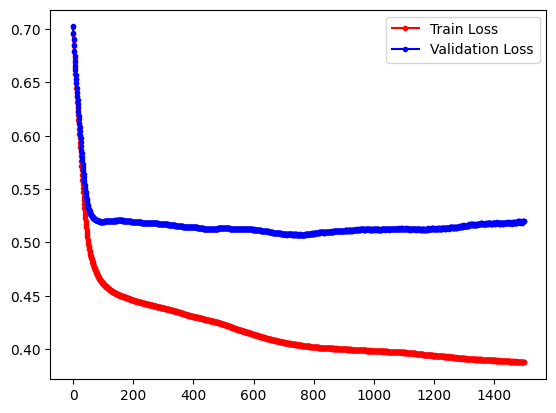

In [34]:
#Graph the trajectory of the loss functions, accuracy on both train and test set

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.776
roc-auc is 0.816


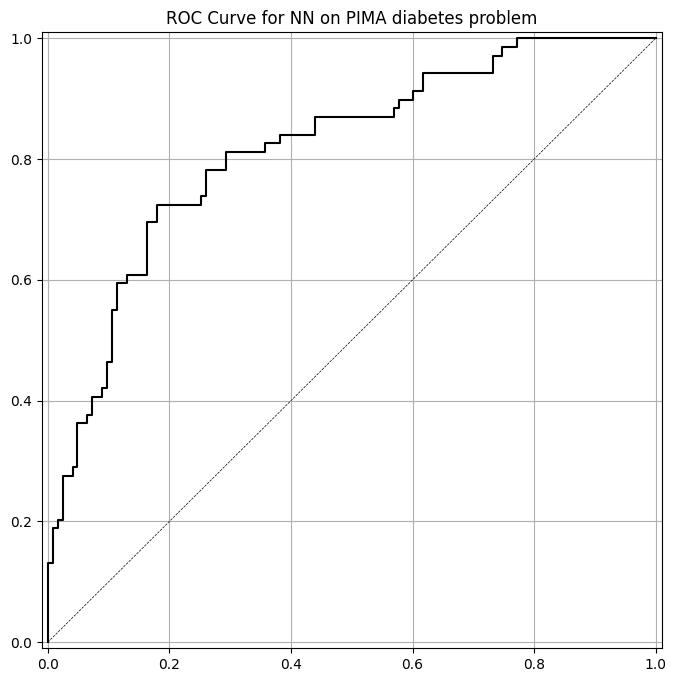

In [35]:
#Plot the roc curve for the predictions
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))
plot_roc(y_test, y_pred_prob_nn_2, 'NN')

Interpretation: As seen on the first graph above, both of the train and test sets descents similarly at the first 100 epochs but both went different ways after. The curve of the validation test indicates that the model is starting to overfit after approximately 100 epochs and not generalizing well to new data. For the accuracy and the ROC-AUC, it indicates that the model is having an acceptable performance with an accuracy of 77.6% and an ROC-AUC of 0.816 indicates that the model is effective in distinguishing people with diabetes and those without.

# Using different learning rates, number of epochs, and network structures.

In [37]:
model_2 = Sequential([
    Dense(10, input_shape=(8,), activation="relu"),
    Dense(15, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [38]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                90        
                                                                 
 dense_12 (Dense)            (None, 15)                165       
                                                                 
 dense_13 (Dense)            (None, 1)                 16        
                                                                 
Total params: 271 (1.06 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
from keras.callbacks import EarlyStopping
e_s = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Observation: I used early stopping to prevent overfitting and ensure that the training and validation losses do not diverge significantly. By monitoring the validation loss during training and stopping the training process when the validation loss stops improving or starts deteriorating, early stopping helps to achieve a model that generalizes well to unseen data. This regularization technique enhances the model's ability to learn general patterns in the data while avoiding the memorization of noise in the training data.

In [40]:
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200, callbacks=[e_s])

Epoch 1/200
18/18 [==============================] - 1s 22ms/step - loss: 0.7008 - accuracy: 0.4774 - val_loss: 0.7054 - val_accuracy: 0.5260
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6836 - accuracy: 0.5625 - val_loss: 0.6924 - val_accuracy: 0.5781
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6215 - val_loss: 0.6808 - val_accuracy: 0.6198
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6701 - val_loss: 0.6705 - val_accuracy: 0.6510
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6858 - val_loss: 0.6610 - val_accuracy: 0.6562
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.6979 - val_loss: 0.6521 - val_accuracy: 0.6562
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.6997 - val_loss: 0.6438 - val_accuracy: 0.6615
Epoch 8/200


Observation: Due to EarlyStopping, the training is terminated at 78 epochs since there is no more improvement in the validation loss.

In [41]:
y_pred_prob_nn_3 = model_2.predict(X_test_norm)
y_pred_class_nn_3 = (model_2.predict(X_test_norm) > 0.5).astype('int32')

6/6 [==============================] - 0s 2ms/step


In [42]:
y_pred_class_nn_3[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [43]:
y_pred_prob_nn_3[:10]

array([[0.6669828 ],
       [0.6361151 ],
       [0.42134437],
       [0.32733962],
       [0.1880226 ],
       [0.5743976 ],
       [0.03201353],
       [0.34402087],
       [0.7677489 ],
       [0.12922247]], dtype=float32)

In [44]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

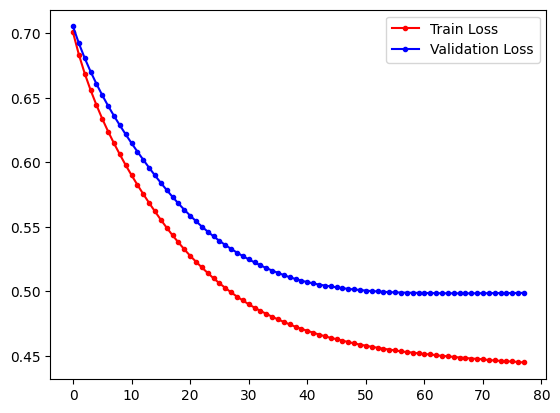

In [45]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.766
roc-auc is 0.821


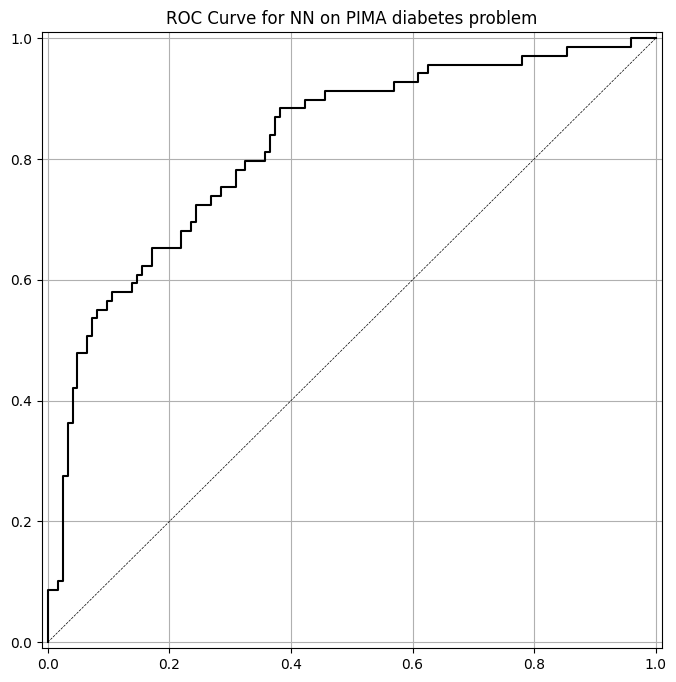

In [46]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))
plot_roc(y_test, y_pred_prob_nn_3, 'NN')

Interpretation: As seen on the first graph, it is much more acceptable compared to the first one, as both of the curves descent similarly and with less gap in between indicating that the model is learning well without overfitting. As for the accuracy and roc curve, the accuracy of 76.6% indicates that the model is performing similarly with the first training (77.6% accuracy) but is notably better than the second training. The ROC-AUC of 0.821 is also similar to the first training which indicates that the second model is also effective at distinguishing between people that has diabetes and those without.



#Conclusion

- After performing this activity, I conclude that the second neural network model trained with an architecture comprising two hidden layers of 10 and 15 nodes, respectively, along with early stopping applied, yielded a slightly lower accuracy compared to the first model. Specifically, the second model achieved an accuracy of 0.766, while the first model achieved an accuracy of 0.776. Although the difference in accuracy between the two models is relatively small (0.01), it suggests a minor decline in performance in the second model. Additionally, the ROC-AUC score for the second model was 0.821, indicating its good discrimination ability between positive and negative classes. While this metric provides valuable insight into the model's classification performance, it's essential to note that accuracy is a more direct measure of correct classification. Overall, while the second model exhibited slightly inferior accuracy compared to the first model, its performance, as indicated by the ROC-AUC score, remained robust. Further analysis may be warranted to understand the factors contributing to the discrepancy in accuracy and to assess the practical significance of the observed difference in performance.